In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


pd.options.display.max_columns = None

In [17]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF,FG_rolling_5,FGA_rolling_5,FG%_rolling_5,3P_rolling_5,3PA_rolling_5,3P%_rolling_5,FT_rolling_5,FTA_rolling_5,FT%_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP FG_rolling_5,OPP FGA_rolling_5,OPP FG%_rolling_5,OPP 3P_rolling_5,OPP 3PA_rolling_5,OPP 3P%_rolling_5,OPP FT_rolling_5,OPP FTA_rolling_5,OPP FT%_rolling_5,OPP ORB_rolling_5,OPP TRB_rolling_5,OPP AST_rolling_5,OPP STL_rolling_5,OPP BLK_rolling_5,OPP TOV_rolling_5,OPP PF_rolling_5,Rest_Days_Binned
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2


In [18]:
# Rename columns with spaces for better usability

df = df.rename(columns={
    "Home Game": "Home_Game",
    "Points For": "Points_For",
    "Points Against": "Points_Against",
    "Rest Days": "Rest_Days",
    "Ranked Match": "Ranked_Match",
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "FG%": "FG_Percent",
    "3P%": "3P_Percent",
    "FT%": "FT_Percent",
    "OPP FG": "OPP_FG",
    "OPP FGA": "OPP_FGA",
    "OPP FG%": "OPP_FG_Percent",
    "OPP 3P": "OPP_3P",
    "OPP 3PA": "OPP_3PA",
    "OPP 3P%": "OPP_3P_Percent",
    "OPP FT": "OPP_FT",
    "OPP FTA": "OPP_FTA",
    "OPP FT%": "OPP_FT_Percent",
    "OPP ORB": "OPP_ORB",
    "OPP TRB": "OPP_TRB",
    'OPP AST': 'OPP_AST',
    'OPP STL': 'OPP_STL',
    'OPP BLK': 'OPP_BLK',
    'OPP TOV': 'OPP_TOV',
    'OPP PF': 'OPP_PF',
    'FG_rolling_5': 'FG_rolling_5',
    'FGA_rolling_5': 'FGA_rolling_5',
    'FG%_rolling_5': 'FG_Percent_rolling_5',
    '3P_rolling_5': '3P_rolling_5',
    '3PA_rolling_5': '3PA_rolling_5',
    '3P%_rolling_5': '3P_Percent_rolling_5',
    'FT_rolling_5': 'FT_rolling_5',
    'FTA_rolling_5': 'FTA_rolling_5',
    'FT%_rolling_5': 'FT_Percent_rolling_5',
    'ORB_rolling_5': 'ORB_rolling_5',
    'TRB_rolling_5': 'TRB_rolling_5',
    'AST_rolling_5': 'AST_rolling_5',
    'STL_rolling_5': 'STL_rolling_5',
    'BLK_rolling_5': 'BLK_rolling_5',
    'TOV_rolling_5': 'TOV_rolling_5',
    'PF_rolling_5': 'PF_rolling_5',
    'OPP FG_rolling_5': 'OPP_FG_rolling_5',
    'OPP FGA_rolling_5': 'OPP_FGA_rolling_5',
    'OPP FG%_rolling_5': 'OPP_FG_Percent_rolling_5',
    'OPP 3P_rolling_5': 'OPP_3P_rolling_5',
    'OPP 3PA_rolling_5': 'OPP_3PA_rolling_5',
    'OPP 3P%_rolling_5': 'OPP_3P_Percent_rolling_5',
    'OPP FT_rolling_5': 'OPP_FT_rolling_5',
    'OPP FTA_rolling_5': 'OPP_FTA_rolling_5',
    'OPP FT%_rolling_5': 'OPP_FT_Percent_rolling_5',
    'OPP ORB_rolling_5': 'OPP_ORB_rolling_5',
    'OPP TRB_rolling_5': 'OPP_TRB_rolling_5',
    'OPP AST_rolling_5': 'OPP_AST_rolling_5',
    'OPP STL_rolling_5': 'OPP_STL_rolling_5',
    'OPP BLK_rolling_5': 'OPP_BLK_rolling_5',
    'OPP TOV_rolling_5': 'OPP_TOV_rolling_5',
    'OPP PF_rolling_5': 'OPP_PF_rolling_5'
})

In [19]:
# Turn our response variable to categorical

df['Result'] = 1 * (df['Result'] == 'W')
df['BIG_10'] = 1 * (df['Conf'] == 'Big Ten')
df

,Date,Time,Season,Type,Opponent,Rank,Ranked_Match,Conf,Rest_Days,SRS,Result,Points_For,Points_Against,W,L,Home_Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P_Percent,FT,FTA,FT_Percent,ORB,TRB,AST,STL,BLK,TOV,PF,OPP_FG,OPP_FGA,OPP_FG_Percent,OPP_3P,OPP_3PA,OPP_3P_Percent,OPP_FT,OPP_FTA,OPP_FT_Percent,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5,Rest_Days_Binned,BIG_10
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4,0
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2,0
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+,0
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024-01-18,8:30p,2023-2024,REG,Michigan,NaN,False,Big Ten,0,5.28,1,88,73,13,4,False,1,0,30,62,0.484,6,18,0.333,22,30,0.733,13,38,12,9,4,6,13,30,63,0.476,3,13,0.231,10,12,0.833,7,25,10,1,0,9,18,25.0,61.400000,0.4084,6.200000,20.2,0.309000,20.00,26.000000,0.77360,10.60,35.400000,10.200000,6.2,4.000000,7.000000,77.400000,29.800000,65.000000,0.459200,3.8

In [20]:
# creat train and test dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=22, stratify=df['Result'])

In [21]:
# Create a basic model predicting Result from the 5 highest correlated variables
model_1 = smf.logit('Result ~ Lose_Streak + Win_Streak + Points_Against + OPP_FG_Percent + FG_Percent', data=df_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.342505
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  132
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.4357
Time:                        20:33:04   Log-Likelihood:                -45.211
converged:                       True   LL-Null:                       -80.119
Covariance Type:            nonrobust   LLR p-value:                 1.119e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7973      2.813      1.350      0.177      -1.716       9.310
Lose_Streak      

In [22]:
# Predict on training data
train_predictions_1 = model_1.predict(df_train[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
train_accuracy_1 = (train_predictions_1.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_1 = model_1.predict(df_test[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
test_accuracy_1 = (test_predictions_1.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_1)
print("Test Accuracy:", test_accuracy_1)

Training Accuracy: 0.8333333333333334
Test Accuracy: 0.9411764705882353


In [23]:
# Now create a model that would be more realistic with what kind of data we would have before a match
model_2 = smf.logit('Result ~ Win_Streak + Lose_Streak + SRS + Rank + Ranked_Match + Home_Game + FG_Percent_rolling_5 + OPP_FG_Percent_rolling_5', data=df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.626613
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                   37
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                 0.09551
Time:                        20:33:04   Log-Likelihood:                -23.185
converged:                       True   LL-Null:                       -25.633
Covariance Type:            nonrobust   LLR p-value:                    0.6726
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.8792   1.82e+14  -2.68e-14      1.000   -3.57e+14

In [24]:
# Predict on training data
train_predictions_2 = model_2.predict(df_train[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
train_accuracy_2 = (train_predictions_2.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_2 = model_2.predict(df_test[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
test_accuracy_2 = (test_predictions_2.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_2)
print("Test Accuracy:", test_accuracy_2)

Training Accuracy: 0.1893939393939394
Test Accuracy: 0.20588235294117646


In [39]:
from sklearn.ensemble import RandomForestClassifier

df_clean = df.dropna()
# non_numeric = []
# for col in df_clean:
#     if df_clean[col].dtypes != "float64":
#         non_numeric.append(col) #gets rid of non numeric attributes (doesn't work with randomforest?)

# X = df_clean.drop(columns= non_numeric) #the features/predictors of our model that don't have nan values
# Y = df_clean['Result'] #goal/ what we're trying to predict with random forest regressor 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_prediction = random_forest.predict(X_test)
y_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
test_data = pd.DataFrame(X_test)
test_data['actual'] = y_test
test_data['prediction'] = y_prediction
test_data.head()

,Ranked_Match,Rank,BIG_10,Rest_Days,SRS,Home_Game,Win_Streak,Lose_Streak,actual,prediction
155,True,1.0,1,0,24.93,False,7,0,0,1
146,True,3.0,1,8,24.93,True,1,0,0,0
22,True,9.0,1,5,17.82,True,0,1,0,1
84,True,3.0,1,3,19.15,False,4,0,0,0
121,True,24.0,1,2,14.58,True,1,0,1,0


In [42]:
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.4


In [43]:
class_report = classification_report(y_test, y_prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



In [44]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train length: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test length: {len(y_test)}")

X_train shape: (36, 8)
Y_train length: 36
X_test shape: (10, 8)
Y_test length: 10


In [68]:
print(X_train.describe())  # Summary statistics
print(X_train.dtypes)      # Check data types


            Rank     BIG_10  Rest_Days        SRS  Win_Streak  Lose_Streak
count  36.000000  36.000000  36.000000  36.000000   36.000000    36.000000
mean   11.805556   0.638889   3.694444  18.024167    2.416667     0.444444
std     6.877788   0.487136   1.704103   3.747007    2.309917     0.876501
min     1.000000   0.000000   0.000000  13.040000    0.000000     0.000000
25%     5.000000   0.000000   3.000000  14.477500    0.000000     0.000000
50%    11.000000   1.000000   4.000000  18.240000    2.000000     0.000000
75%    18.250000   1.000000   4.000000  21.400000    4.000000     1.000000
max    24.000000   1.000000  10.000000  26.700000    8.000000     4.000000
Ranked_Match       bool
Rank            float64
BIG_10            int32
Rest_Days         int64
SRS             float64
Home_Game          bool
Win_Streak        int64
Lose_Streak       int64
dtype: object


In [90]:
import lightgbm as lgb

params = {'objective' : 'binary', 
          'boosting_type' : 'gbdt',           
          'num_leaves' : 5, 
          'force_row_wise' : True, 
          'metric' : 'rmse', 
          'learning_rate' : 0.5, 
          'feature_fraction' : 0.8, 
          'bagging_fraction' : 0.8,
          'min_data_in_bin' : 1,
          'min_data_in_leaf' : 1,
          'max_bin' : 256
          } 

#https://lightgbm.readthedocs.io/en/latest/Parameters.html <- explanation for parameters
#https://www.geeksforgeeks.org/train-a-model-using-lightgbm/ <- same here

training_data = lgb.Dataset(X_train, label = y_train)
testing_data = lgb.Dataset(X_test, label = y_test, reference = training_data)

gbm = lgb.train(params, training_data,
                 num_boost_round = 41, 
                 valid_sets = testing_data)

#looking into lightgbm modeling, documentation (https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api)

[LightGBM] [Info] Number of positive: 17, number of negative: 19
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472222 -> initscore=-0.111226
[LightGBM] [Info] Start training from score -0.111226


In [94]:
y_pred_proba = gbm.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) #converts to binary predictions 
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [96]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define features and target
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


In [34]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False, 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=22, ...)

In [35]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7647058823529411

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.90      0.75      0.82        24

    accuracy                           0.76        34
   macro avg       0.74      0.78      0.74        34
weighted avg       0.80      0.76      0.77        34

Test AUC-ROC Score: 0.7833333333333333


<Figure size 1000x600 with 0 Axes>

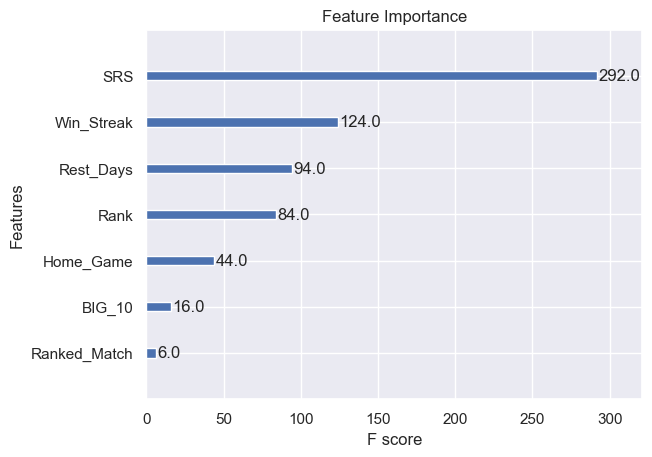

In [36]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

X = df[features]
Y = df[target]

scores = cross_val_score(xgb_model, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Cross-Validation Accuracy Scores: [0.76470588 0.54545455 0.72727273 0.72727273 0.6969697 ]
Mean CV Accuracy: 0.6923351158645277


C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
